In [31]:
pip install wooldridge

In [32]:
from scipy import stats
import statsmodels.formula.api as sm
import statsmodels.stats.stattools as tools
import statsmodels
from statsmodels.api import add_constant, OLS
import matplotlib.pyplot as plt
import math
import numpy as np
import scipy as sp
import seaborn as sns

In [33]:
import wooldridge

In [34]:
data = wooldridge.data('mlb1')

In [35]:
data = data[['nl', 'salary', 'years', 'hits', 'rbis', 'bavg']]
data.head(3)

,nl,salary,years,hits,rbis,bavg
0,1,6329213.0,12,1939,836,289.0
1,1,3375000.0,8,863,342,259.0
2,1,3100000.0,5,840,355,299.0


In [36]:
# quartiles and counts
data.describe()

,nl,salary,years,hits,rbis,bavg
count,353.000000,3.530000e+02,353.000000,353.000000,353.000000,353.000000
mean,0.475921,1.345672e+06,6.325779,584.736544,264.745042,258.985836
std,0.500129,1.407352e+06,3.880142,575.378562,282.988672,38.422403
min,0.000000,1.090000e+05,1.000000,1.000000,1.000000,111.000000
25%,0.000000,2.536000e+05,3.000000,164.000000,60.000000,245.000000
50%,0.000000,6.750000e+05,6.000000,419.000000,173.000000,259.000000
75%,1.000000,2.250000e+06,9.000000,818.000000,361.000000,275.000000
max,1.000000,6.329213e+06,20.000000,3025.000000,1710.000000,625.000000


# Correlation

Correlation coefficients are a quantitative measure that describe the strength of association/relationship between two variables.

cov(x, y)$ = \frac{1}{n-1} \Sigma (x_i-\overline{x})(y_i-\overline{y})$

cor(x,y)$ = \frac{1}{n-1} \Sigma (\frac{x_i-\overline{x}}{s_x})(\frac{y_i-\overline{y})}{s_y})$

In [37]:
data.corr()

,nl,salary,years,hits,rbis,bavg
nl,1.000000,-0.049160,-0.119650,-0.112177,-0.128128,-0.031582
salary,-0.049160,1.000000,0.478152,0.627098,0.649485,0.281900
years,-0.119650,0.478152,1.000000,0.882413,0.822251,0.197296
hits,-0.112177,0.627098,0.882413,1.000000,0.942423,0.320975
rbis,-0.128128,0.649485,0.822251,0.942423,1.000000,0.278701
bavg,-0.031582,0.281900,0.197296,0.320975,0.278701,1.000000


# Linear Regression

* simple linear regression model: $y_i = B_0 + B_ix_i + ϵ_i$
* $y_i$ - response variable
* $x_i$ - predictor variable or regressor
* $B_0$ - intercept
* $B_i$ - slope of $x_i$
* $ϵ_i$ - residual ($y_i - \hat y$)

Least-squares estimators
 * $\hat B_1 = \frac{\Sigma(x_i - \overline x)(y_i - \overline y)}{\Sigma(x_i - \overline x)^2}$
 * $\hat B_0 = \overline y - \hat B_1 \overline x$
 * $\sigma^2 = \frac{1}{n-2} \Sigma[y_i - (\hat B_0 + \hat B_1 x_i)]^2$

Prediction line: $\hat y = \hat B_0 + \hat B_1$

Coefficient of determination: $R^2 = \frac{\Sigma(\hat y - \overline y)^2}{(y_i - \overline y)^2}$
* $R^2$ ranges from 0 to 1 and is good (stronger) when closer to 1. This metric measures the percentage of variation explained by the regression line. 

Sample skewness = $\sqrt{n}{\frac{\Sigma (x_i - \overline x)^3}{(\Sigma (x_i - \overline x)^2)^{3/2} }}$

The sample skewness of a data set is a numeric measure of skew. Positive skews indicate the data is skewed to the right. 

sample excess kurtosis = $n {\frac{\Sigma (x_i - \overline x)^4}{(\Sigma (x_i - \overline x)^2)^{2} }}$

The sample excess kurtosis is a measure of the tails in a data set. Longer tails will lead to larger values. Normal distributed data will have kurtosis that is roughly 3.

In [38]:
(B1,B0,r_value,p_value,std_err)=stats.linregress(data['salary'],data['hits'])
print(f"Slope: {B1}, Intercept: {B0}")
print("R-squared=", r_value**2)
print("p-value =", p_value)
print("standard error", std_err)

# p-value is small enought to accept this model

Slope: 0.00025638149036123146, Intercept: 239.73108709817018
R-squared= 0.3932523663335087
p-value = 5.59349784693392e-40
standard error 1.6998143171295615e-05


In [39]:
stats.linregress(data['rbis'],data['years'])

LinregressResult(slope=0.011274132429071233, intercept=3.341008367821949, rvalue=0.8222513871479324, pvalue=6.182036695931497e-88, stderr=0.00041651650317000465)

In [40]:
# Multiple linear regression example
# predict number of years in league by rbis and hits

Y = data['years']
X = data[['rbis', 'salary']]
X = add_constant(X)
model = OLS(Y,X)
results = model.fit()
results.params

const     3.471743e+00
rbis      1.213495e-02
salary   -2.665077e-07
dtype: float64

In [41]:
results.pvalues

const     3.934452e-62
rbis      3.292442e-69
salary    1.532692e-02
dtype: float64

In [42]:
results.rsquared

0.6814997215368743

In [43]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  years   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     374.5
Date:                Sun, 23 Jan 2022   Prob (F-statistic):           1.11e-87
Time:                        16:32:38   Log-Likelihood:                -777.07
No. Observations:                 353   AIC:                             1560.
Df Residuals:                     350   BIC:                             1572.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4717      0.169     20.553      0.000       3.140       3.804
rbis           0.0121      0.001     22.308      0.000       0.011       0.013
salary     -2.665e-07   1.09e-07     -2.437      0.015   -4.82e-07   -5.14e-08
==============================================================================
Omnibus:                       34.551   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.751
Skew:                           0.812   Prob(JB):                     8.59e-10
Kurtosis:                       3.450   Cond. No.                     2.81e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


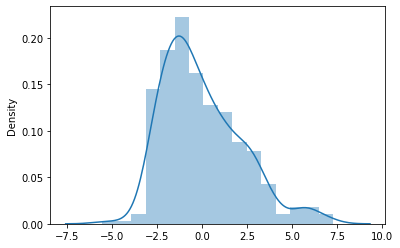

In [44]:
# histogram of residuals

sns.distplot(results.resid)

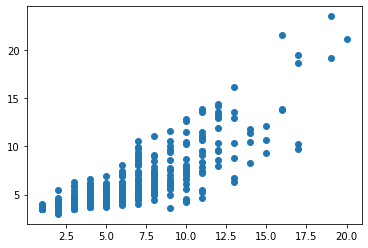

In [45]:
# scatter plot of actual number of years and predicted number of years

pred = results.predict(X)
plt.scatter(Y, pred)